Three types of token ratios（<70; 70-180; >180）

In [2]:
import numpy as np
from datasets import load_from_disk

train_datsset_path = "/share/home/liangzhongming/930/CGMformer/data/Shanghai_train_subSampleV3"
train_dataset=load_from_disk(train_datsset_path)

def count_tokens(sample):
    tokens = np.array(sample['input_ids'])
    print(tokens)
    count_low = np.sum(tokens < 70)
    count_mid = np.sum(np.logical_and(tokens >= 70, tokens < 180))
    count_high = np.sum(tokens >= 180)
    return count_low, count_mid, count_high

count_low_total = 0
count_mid_total = 0
count_high_total = 0

for sample in train_dataset:
    count_low, count_mid, count_high = count_tokens(sample)
    count_low_total += count_low
    count_mid_total += count_mid
    count_high_total += count_high

count_low_total, count_mid_total, count_high_total

[ 84.6  84.6  86.4  84.6  84.6  84.6  88.2  88.2  88.2  90.   90.   88.2
  88.2  86.4  86.4  86.4  88.2  88.2  86.4  86.4  86.4  88.2  90.   90.
  91.8  90.   91.8  90.   90.   91.8  84.6  91.8  93.6  93.6  88.2  90.
  93.6  90.  111.6 120.6 127.8 127.8 115.2 102.6  95.4  88.2  88.2  84.6
  88.2  86.4  84.6  88.2  99.  106.2 120.6 115.2 108.  113.4 113.4 113.4
 106.2 111.6 108.  102.6 108.  104.4  97.2  97.2  97.2  95.4  90.   88.2
  88.2  90.   93.6  93.6  88.2  84.6 100.8 102.6 102.6 102.6 108.   99.
 115.2 126.  122.4 140.4 120.6 111.6  93.6  73.8  55.8  63.   77.4  66.6]
[ 84.6  84.6  86.4  84.6  84.6  86.4  88.2  88.2  88.2  90.   88.2  88.2
  86.4  86.4  86.4  88.2  90.   90.   84.6  86.4  86.4  90.   90.   90.
  90.   93.6  91.8  90.   91.8  90.   91.8  91.8  93.6  90.   90.   93.6
  90.   97.2 113.4 126.  129.6 122.4 111.6 102.6  95.4  86.4  88.2  88.2
  88.2  88.2  84.6  90.  106.2 111.6 117.  109.8 109.8 115.2 109.8 111.6
 108.  106.2 104.4 106.2 109.8 104.4  95.4  97.2  99. 

(8265, 337182, 42777)

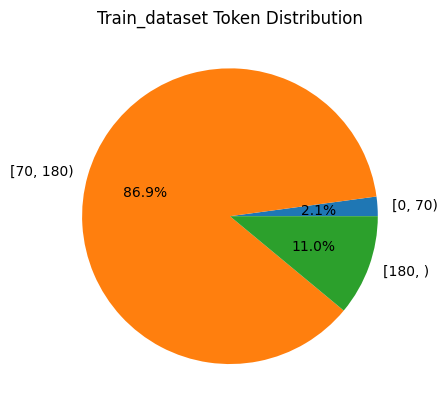

In [3]:
import matplotlib.pyplot as plt

total = count_low_total + count_mid_total + count_high_total
proportions = [count_low_total / total, count_mid_total / total, count_high_total / total]

labels = ['[0, 70)', '[70, 180)', '[180, )']
plt.pie(proportions, labels=labels, autopct='%1.1f%%')
plt.title('Train_dataset Token Distribution')
# plt.legend()
plt.show()

Experiment 2, Samples with the presence of hypoglycemic tokens and their labels

In [4]:
for sample in train_dataset:
    samples_with_low_values = [sample for sample in train_dataset if min(sample['input_ids']) < 70]
    types_of_samples_with_low_values = [sample['types'] for sample in samples_with_low_values]


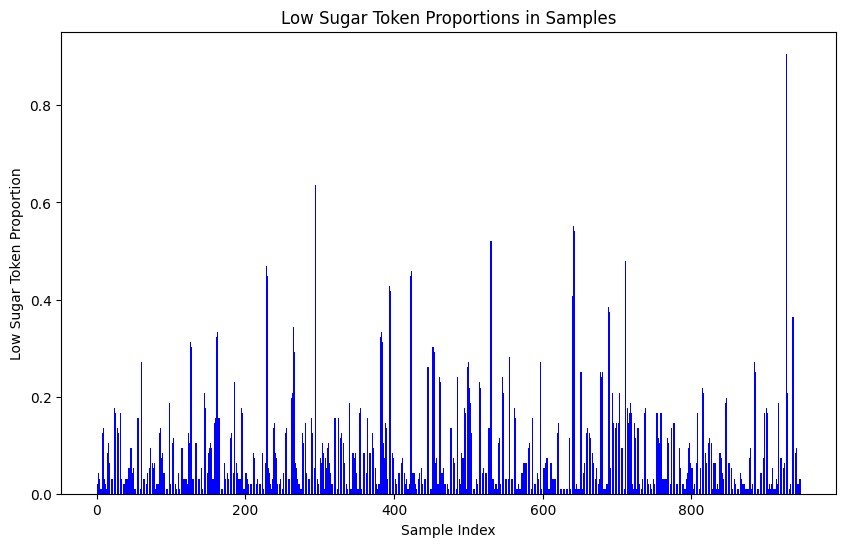

In [5]:
low_sugar_token_counts = []
sample_counts = len(samples_with_low_values)
for sample in samples_with_low_values:
    low_sugar_tokens = [token for token in sample['input_ids'] if token <= 70]
    low_sugar_token_ratio = len(low_sugar_tokens) / len(sample['input_ids'])
    low_sugar_token_counts.append(low_sugar_token_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(sample_counts), low_sugar_token_counts, color='blue')

plt.title('Low Sugar Token Proportions in Samples')
plt.xlabel('Sample Index')
plt.ylabel('Low Sugar Token Proportion')
# plt.legend()

plt.show()

Samples with a percentage higher than 40%

In [15]:
high_proportion_samples = [sample for sample, proportion in zip(samples_with_low_values, low_sugar_token_counts) if proportion >= 0.4]
len(high_proportion_samples) # 26 for 0.4; 101 for 0.2; 3 for 0.8
blood_sugar_values = [sample['input_ids'] for sample in high_proportion_samples]
mean_blood_sugar = np.mean(blood_sugar_values)
std_blood_sugar = np.std(blood_sugar_values)
mean_blood_sugar, std_blood_sugar
high_proportion_samples[13]

{'input_ids': [95.4,
  72.0,
  88.2,
  88.2,
  84.60000000000001,
  68.39999999999999,
  66.60000000000001,
  57.6,
  55.8,
  61.2,
  72.0,
  66.60000000000001,
  46.8,
  52.2,
  61.2,
  64.8,
  66.60000000000001,
  66.60000000000001,
  70.2,
  73.8,
  63.0,
  41.4,
  48.6,
  45.0,
  39.6,
  43.2,
  64.8,
  88.2,
  91.8,
  88.2,
  91.8,
  100.8,
  93.6,
  109.8,
  91.8,
  88.2,
  79.2,
  70.2,
  64.8,
  66.60000000000001,
  79.2,
  63.0,
  66.60000000000001,
  63.0,
  75.60000000000001,
  72.0,
  63.0,
  70.2,
  61.2,
  57.6,
  61.2,
  59.4,
  70.2,
  68.39999999999999,
  64.8,
  61.2,
  68.39999999999999,
  66.60000000000001,
  57.6,
  75.60000000000001,
  77.39999999999999,
  77.39999999999999,
  68.39999999999999,
  64.8,
  70.2,
  59.4,
  52.2,
  46.8,
  66.60000000000001,
  50.4,
  66.60000000000001,
  77.39999999999999,
  81.0,
  75.60000000000001,
  72.0,
  55.8,
  45.0,
  50.4,
  50.4,
  57.6,
  54.0,
  59.4,
  73.8,
  77.39999999999999,
  84.60000000000001,
  84.60000000000001

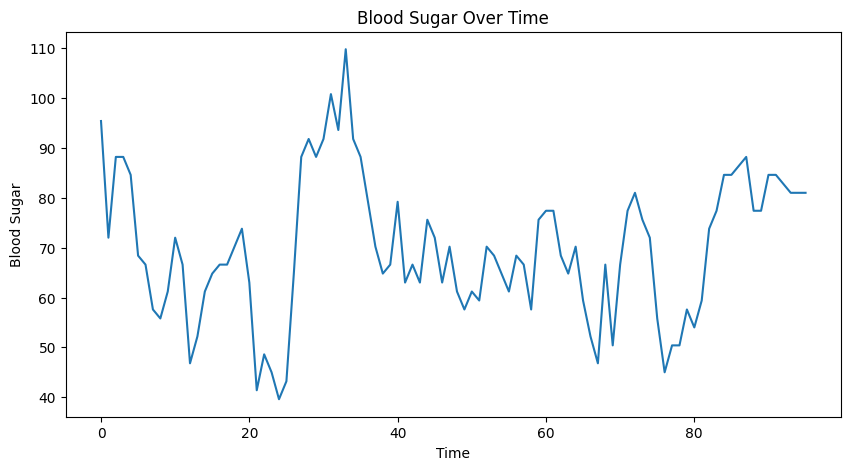

In [14]:
blood_sugar_values[3]
plt.figure(figsize=(10, 5))
plt.plot(blood_sugar_values[13])
plt.xlabel("Time")
plt.ylabel("Blood Sugar")
plt.title("Blood Sugar Over Time")
plt.show()

In [34]:
samples_with_low_values[6]

{'input_ids': [72.0,
  68.39999999999999,
  77.39999999999999,
  75.60000000000001,
  73.8,
  73.8,
  73.8,
  77.39999999999999,
  81.0,
  82.8,
  86.39999999999999,
  93.6,
  95.4,
  95.4,
  93.6,
  82.8,
  84.60000000000001,
  102.6,
  106.2,
  100.8,
  97.2,
  97.2,
  93.6,
  90.0,
  90.0,
  88.2,
  97.2,
  104.4,
  97.2,
  106.2,
  104.4,
  115.2,
  108.0,
  115.2,
  115.2,
  115.2,
  118.8,
  115.2,
  117.0,
  122.4,
  124.2,
  147.6,
  171.0,
  153.0,
  149.4,
  133.20000000000002,
  115.2,
  111.6,
  113.4,
  131.4,
  120.6,
  111.6,
  100.8,
  108.0,
  129.6,
  133.20000000000002,
  124.2,
  131.4,
  129.6,
  118.8,
  113.4,
  108.0,
  106.2,
  106.2,
  108.0,
  104.4,
  106.2,
  100.8,
  111.6,
  100.8,
  91.8,
  91.8,
  131.4,
  122.4,
  122.4,
  120.6,
  108.0,
  106.2,
  95.4,
  97.2,
  104.4,
  113.4,
  106.2,
  115.2,
  100.8,
  93.6,
  93.6,
  111.6,
  86.39999999999999,
  84.60000000000001,
  88.2,
  135.0,
  108.0,
  102.6,
  97.2,
  106.2],
 'types': 1}

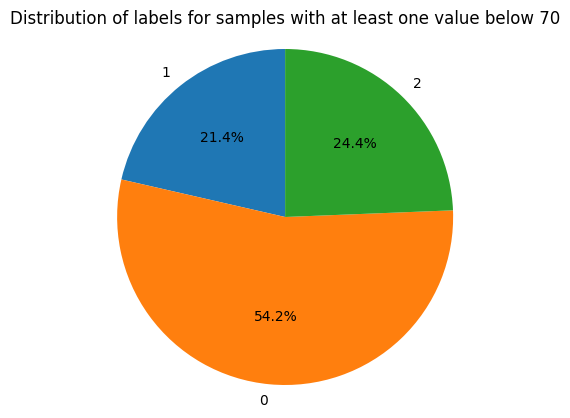

In [33]:
from collections import Counter

counter = Counter(types_of_samples_with_low_values)

labels, counts = zip(*counter.items())

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of labels for samples with at least one value below 70')

plt.show()

In [35]:

label_totals = {0: 0, 1: 0, 2: 0}


label_low_glucose_counts = {0: 0, 1: 0, 2: 0}


for sample in train_dataset:
    label = sample['types']
    label_totals[label] += 1

    if min(sample['input_ids']) < 70:
        label_low_glucose_counts[label] += 1


low_glucose_ratios = {label: label_low_glucose_counts[label] / label_totals[label] for label in label_totals}

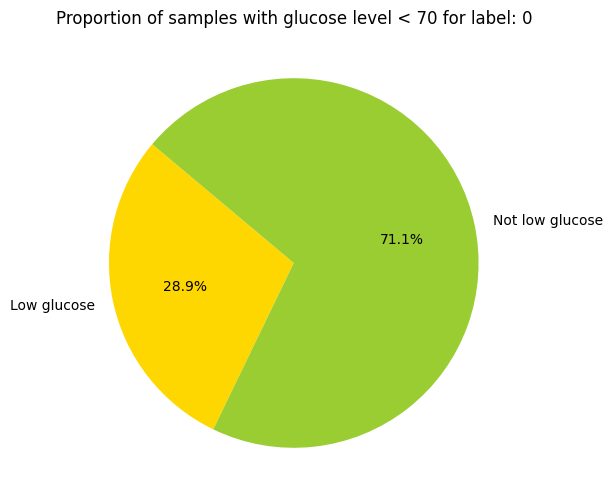

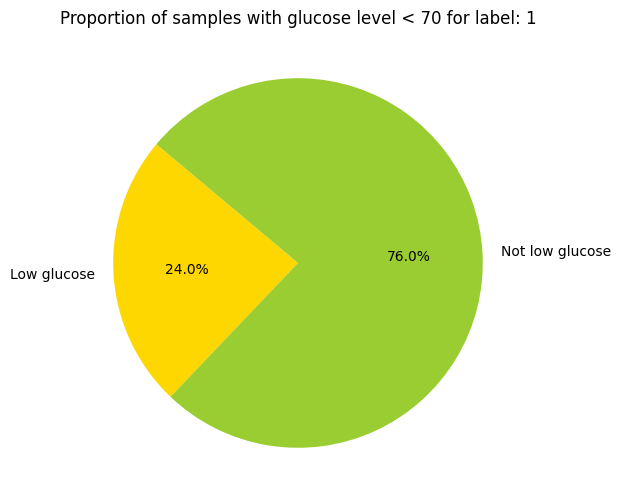

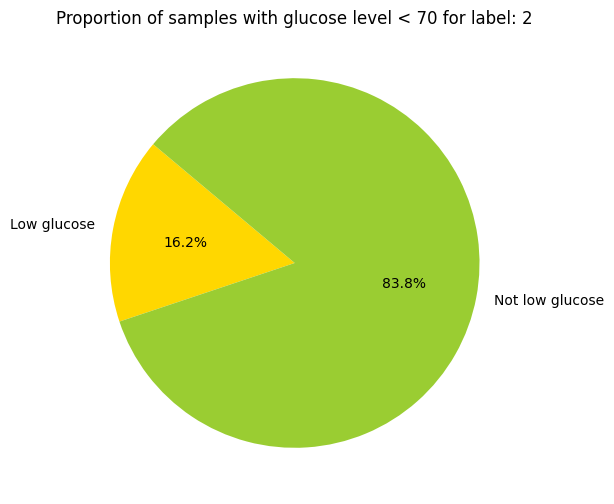

In [37]:

colors = ['gold', 'yellowgreen', 'lightcoral']

for label in low_glucose_ratios.keys():
    ratios = [low_glucose_ratios[label], 1-low_glucose_ratios[label]]
    
    plt.figure(figsize=(6, 6))
    plt.pie(ratios, labels=['Low glucose', 'Not low glucose'], colors=colors, autopct='%1.1f%%', startangle=140)
    
    plt.title(f"Proportion of samples with glucose level < 70 for label: {label}")
    
    plt.show()